DATA ANALYSIS - INDIAN PREMIER LEAGUE

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
matches = pd.read_csv('matches.csv')

In [3]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [4]:
matches.shape

(756, 18)

In [5]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

To find the number of NaN values we use `isna` module we use `sum` to find the sum of NaN  

In [6]:
matches.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Replacing NaN to 0 

In [7]:
matches['city'].replace(np.NaN,'0',inplace=True)
matches['winner'].replace(np.NaN,'0',inplace=True)
matches['umpire1'].replace(np.NaN,'0',inplace=True)
matches['umpire2'].replace(np.NaN,'0',inplace=True)
matches['umpire3'].replace(np.NaN,'0',inplace=True)
matches['player_of_match'].replace(np.NaN,'0',inplace=True)

Let's check for NaN values.

In [8]:
matches.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

booyah! We have changed `NaN` to `0` 
Let start analysing our data. 

### HIGHEST NUMBER OF TOSSES WON BY

In [9]:
toss_win = matches['toss_winner'].value_counts()
print('Most Tosses won by; \n') 
toss_win

Most Tosses won by; 



Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

> ### MI (Mumbai Indians) won highest number of tosses.


### HIGHEST NUMBER OF MATCHES WON BY 

In [10]:
matches_won = matches['winner'].value_counts()
print('Most matches won by: \n')
matches_won

Most matches won by: 



Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
0                                4
Name: winner, dtype: int64

> #### MI (MUMBAI INDIANS) WON HIGHEST NUMBER OF MATCHES

### Toss winning statistics

In [11]:
teams_toss = matches['toss_winner'].value_counts().index.tolist()
teams_winner = matches['winner'].value_counts().index.tolist()

Text(0.5, 1.0, 'TOSS WINNING STATISTICS')

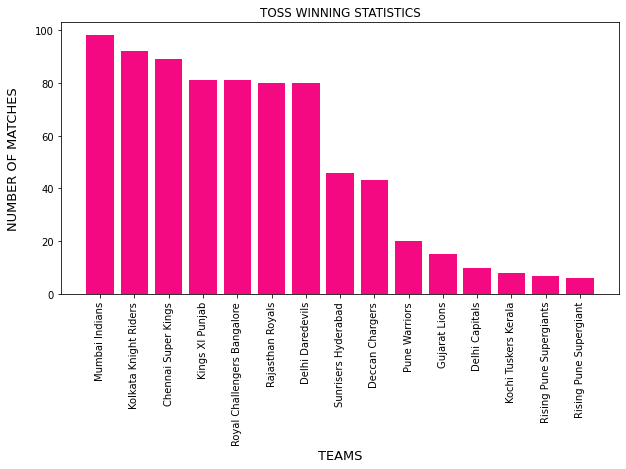

In [12]:
#toss winning statistics
plt.figure(figsize=(10,5))
plt.bar(teams_toss,toss_win,color='#F50982')
plt.xticks(rotation=90)
plt.tick_params(axis='x',which='major' ,labelsize=10)
plt.tick_params(axis='y',which='major' ,labelsize=10)
plt.xlabel('TEAMS',fontsize=13)
plt.ylabel('NUMBER OF MATCHES',labelpad=15,fontsize=13)
plt.title('TOSS WINNING STATISTICS')

### MATCH WINNING STATISTICS

Text(0.5, 1.0, 'MATCH WINNING STATISTICS')

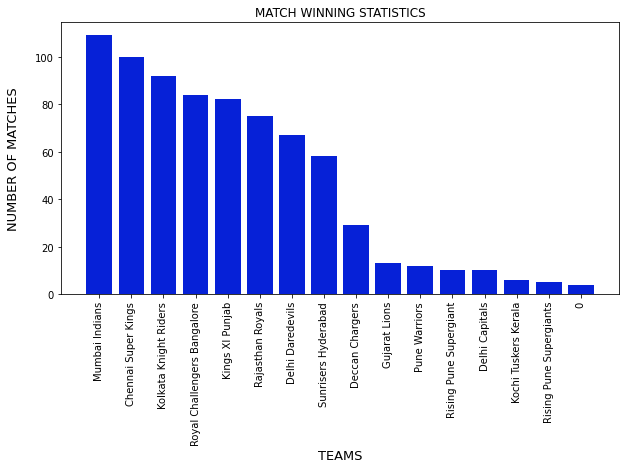

In [13]:
#match winning statistics
plt.figure(figsize=(10,5))
plt.bar(teams_winner,matches_won,color='#0621D7')
plt.xticks(rotation=90)
plt.tick_params(axis='x',which='major' ,labelsize=10)
plt.tick_params(axis='y',which='major' ,labelsize=10)
plt.xlabel('TEAMS',fontsize=13)
plt.ylabel('NUMBER OF MATCHES',labelpad=15,fontsize=13)
plt.title('MATCH WINNING STATISTICS')

###  Number of Matches played each season


In [14]:
count_df = matches.iloc[:, 1]
season = count_df.value_counts().keys().tolist()
values = count_df.value_counts().tolist()
print('Season {score}\n\nMatches played {run}'.format(score = season, run = values))

Season [2013, 2012, 2011, 2019, 2018, 2016, 2014, 2010, 2017, 2015, 2008, 2009]

Matches played [76, 74, 73, 60, 60, 60, 60, 60, 59, 59, 58, 57]


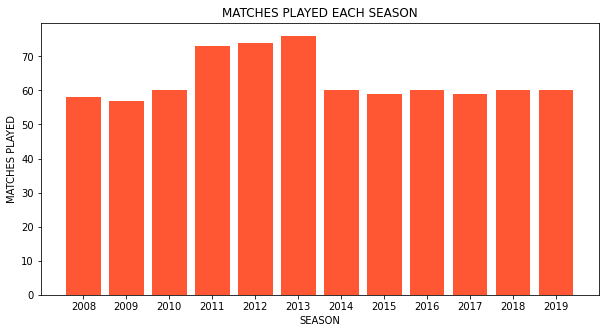

In [15]:
plt.gcf().set_size_inches(10,5)
plt.xlabel('SEASON')
plt.ylabel('MATCHES PLAYED')
plt.title('MATCHES PLAYED EACH SEASON')
plt.bar(season, values, color = '#FF5733')
plt.xticks(season)
plt.show()

In [16]:
ManOfTheMatch = matches.iloc[:, 13]
players = ManOfTheMatch.value_counts().head(30).keys().tolist()
runs = ManOfTheMatch.value_counts().head(30).tolist()
print('Man of the match {man}\n\nRuns{run}'.format(man = players, run = runs))

Man of the match ['CH Gayle', 'AB de Villiers', 'RG Sharma', 'MS Dhoni', 'DA Warner', 'YK Pathan', 'SR Watson', 'SK Raina', 'G Gambhir', 'V Kohli', 'MEK Hussey', 'AM Rahane', 'V Sehwag', 'A Mishra', 'AD Russell', 'DR Smith', 'KA Pollard', 'JH Kallis', 'SE Marsh', 'SP Narine', 'AT Rayudu', 'RA Jadeja', 'SR Tendulkar', 'UT Yadav', 'Harbhajan Singh', 'AC Gilchrist', 'RV Uthappa', 'Rashid Khan', 'M Vijay', 'A Nehra']

Runs[21, 20, 17, 17, 17, 16, 15, 14, 13, 12, 12, 12, 11, 11, 11, 11, 10, 10, 9, 9, 9, 8, 8, 8, 8, 7, 7, 7, 6, 6]


PIE CHART TO REPRESENT MAN OF THE MATCH 

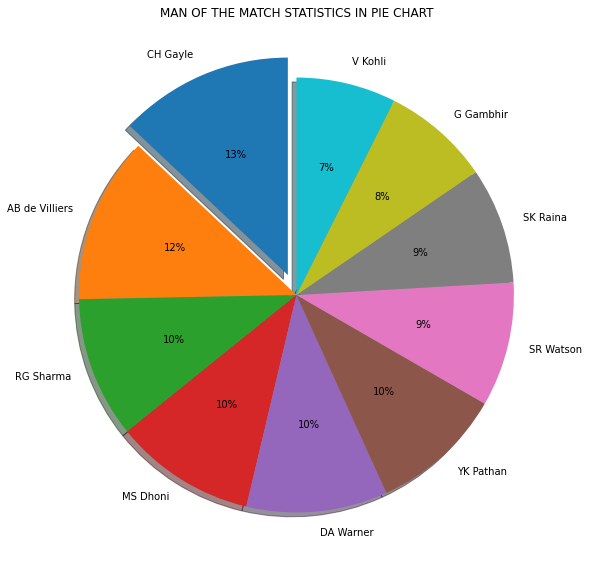

In [17]:
#counting the number of man of the match awards received by each player
man_count = matches['player_of_match'].value_counts()
names = man_count.index.tolist()

#plotting the data of top 10 players
plt.figure(figsize=(10,10))
plt.pie(man_count.head(10),labels=names[:10],autopct='%.0f%%',explode=(0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0),shadow=True,startangle=90)
plt.title('MAN OF THE MATCH STATISTICS IN PIE CHART');

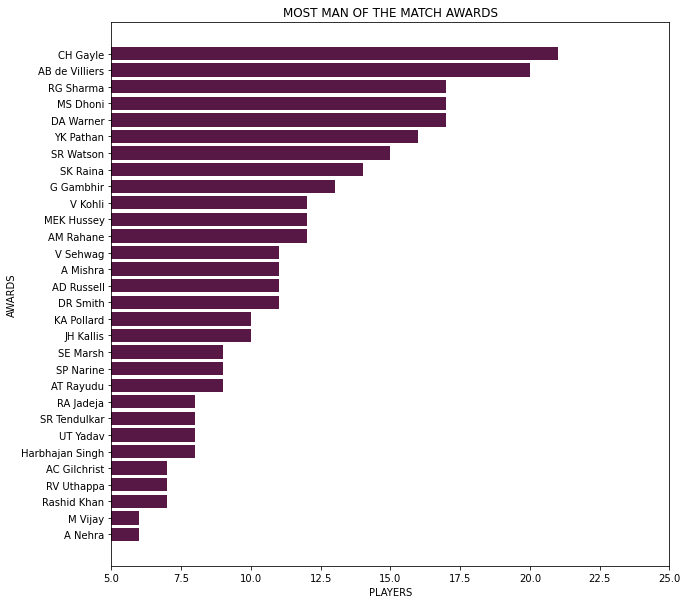

In [18]:
plt.gcf().set_size_inches(10,10)
plt.xlabel('PLAYERS')
plt.ylabel('AWARDS')
plt.title('MOST MAN OF THE MATCH AWARDS')
plt.barh(players, runs, color = '#581845' )
plt.gca().invert_yaxis()
plt.xlim(5, 25)
plt.show()

### Probability of Toss determining winner 

In [19]:
prob_toss_win = matches.loc[:, ['toss_winner', 'winner']]
when_true = prob_toss_win['toss_winner'] == prob_toss_win['winner']
prob_toss_win = prob_toss_win[when_true]
percentage = (prob_toss_win.shape[0]/matches.shape[0]) * 100

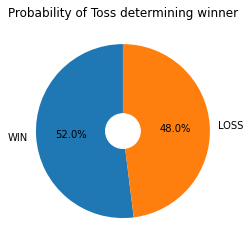

In [20]:
labels = ['WIN', 'LOSS']
percent = [percentage, 100 - percentage]
plt.pie(percent, labels = labels,autopct='%1.1f%%', startangle=90)
plt.title('Probability of Toss determining winner')
pie_toss_winner = plt.Circle((0,0), 0.2, color='white')
p = plt.gcf()
p.gca().add_artist(pie_toss_winner)
plt.show()

It's okay if you've lost the toss, you still have an equal chance of winning the match. 

`Importing Deliveries.csv file`

In [21]:
cricket = pd.read_csv('deliveries.csv')
cricket

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41299,176,1,Mumbai Indians,Rajasthan Royals,14,4,AT Rayudu,SS Tiwary,YK Pathan,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
41300,176,1,Mumbai Indians,Rajasthan Royals,14,5,SS Tiwary,AT Rayudu,YK Pathan,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
41301,176,1,Mumbai Indians,Rajasthan Royals,14,6,AT Rayudu,SS Tiwary,YK Pathan,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
41302,176,1,Mumbai Indians,Rajasthan Royals,15,1,SS Tiwary,AT Rayudu,AA Jhunjhunwala,0,0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN


In [22]:
cricket.shape

(41304, 21)

In [23]:
cricket.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [24]:
matches.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

## TOP SCORE (Batting)

In [25]:
# To Find the highest score by an individual IPL player
h_score = cricket.groupby(['batsman'])
player_runs = dict()

# For loop for sorting the higest score by each player
for batsman,group in h_score:
    runs = h_score.get_group(batsman).batsman_runs.sum()
    player_runs.setdefault(batsman,runs)
sort=sorted(player_runs.items(),reverse=True,key=lambda x: x[1])

# Empty dict to store values
batsman=[]
batsman_runs=[]

# Sorting out the best
for i in dict(sort).keys():
    batsman.append(i)
for i in dict(sort).values():
    batsman_runs.append(i)

Text(0.5, 1.0, 'RUNS BY AN INDIVIDUAL PLAYER')

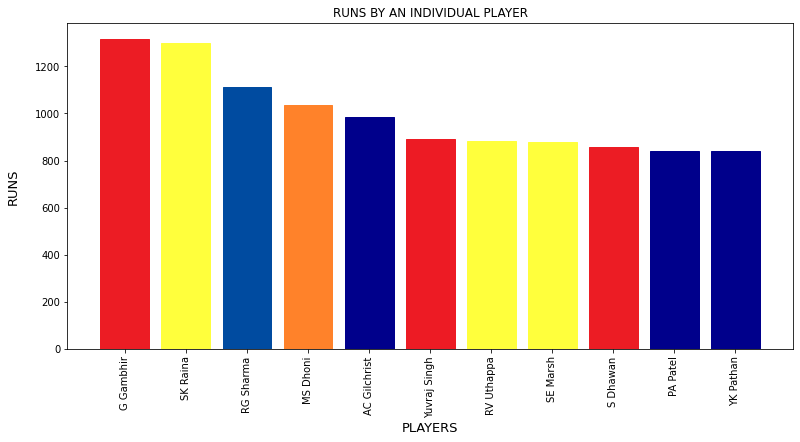

In [26]:
plt.figure(figsize=(13,6))
plt.xticks(rotation=90)
barplot=plt.bar(batsman[:11],batsman_runs[:11])

# Authentic Color of each teams (Eg: MS DHONI Team - CSK, Color - Yellow)
barplot[0].set_color('#EC1C24')
barplot[1].set_color('#FFFF3C')
barplot[2].set_color('#004BA0')
barplot[3].set_color('#FF822A')
barplot[4].set_color('#00008B')
barplot[5].set_color('#ED1B24')
barplot[6].set_color('#FFFF3C')
barplot[7].set_color('#FFFF3C')
barplot[8].set_color('#EC1C24')
barplot[9].set_color('#00008B')
barplot[10].set_color('#00008B')

plt.xlabel('PLAYERS',fontsize=13)
plt.ylabel('RUNS',labelpad=15,fontsize=13)
plt.title('RUNS BY AN INDIVIDUAL PLAYER')

# Highest wicket takers in the IPL

In [27]:
wicket = cricket.loc[:, ['batsman', 'bowler', 'dismissal_kind']]
dismissal_kinds = [
 'caught',
 'bowled',
 'run out',
 'lbw',
 'caught and bowled',
 'stumped',
 'hit wicket']
is_bowler = (wicket['dismissal_kind'] == 'bowled') | (wicket['dismissal_kind'] == 'caught') | (wicket['dismissal_kind'] == 'caught and bowled') | (wicket['dismissal_kind'] == 'stumped') | (wicket['dismissal_kind'] == 'lbw') | (wicket['dismissal_kind'] == 'hit wicket')
bowler_data = wicket[is_bowler].loc[:, ['bowler']]
bowler = bowler_data['bowler'].value_counts().head(10).keys().tolist()
wickets = bowler_data['bowler'].value_counts().head(10).tolist()
print('Bowler {bowl}\n\nWickets{wick}'.format(bowl = bowler, wick = wickets))

Bowler ['A Nehra', 'RP Singh', 'PP Chawla', 'A Mishra', 'SK Warne', 'IK Pathan', 'MM Patel', 'JA Morkel', 'P Kumar', 'PP Ojha']

Wickets[39, 39, 35, 35, 33, 32, 31, 30, 30, 29]


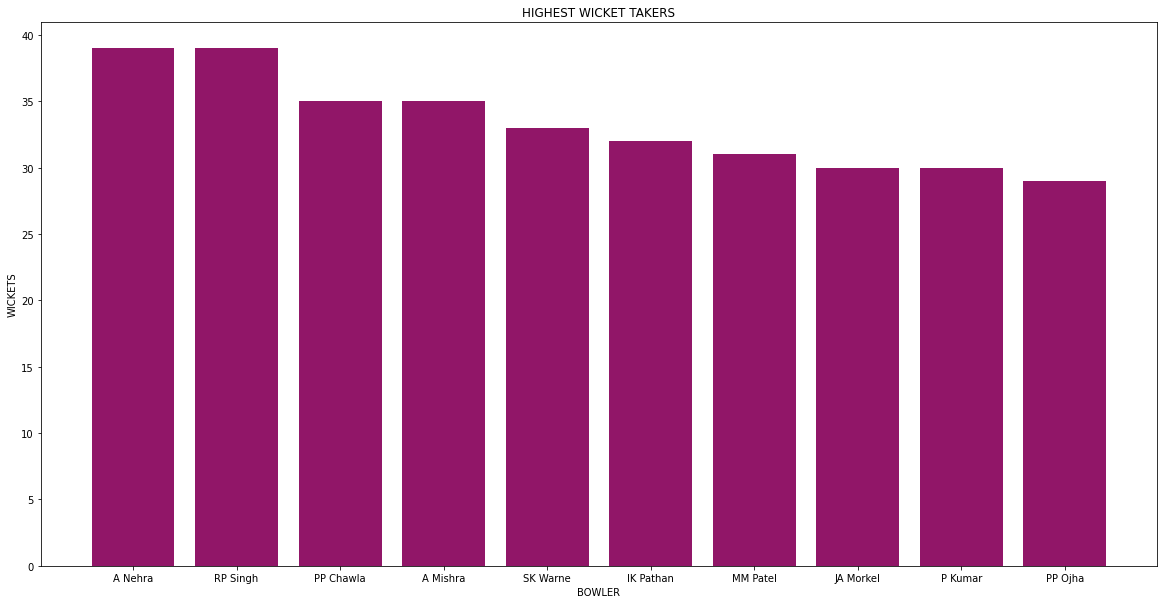

In [28]:
plt.gcf().set_size_inches(20,10)
plt.xlabel('BOWLER')
plt.ylabel('WICKETS')
plt.title('HIGHEST WICKET TAKERS')
plt.bar(bowler, wickets, color = '#911668')
plt.show()

# Top 10 Stadiums

In [29]:
#finding the top 10 stadiums with maximum match counts 
count_stadium=matches['venue'].value_counts().head(20)
stadium_names=matches['venue'].value_counts().head(20).index.tolist()

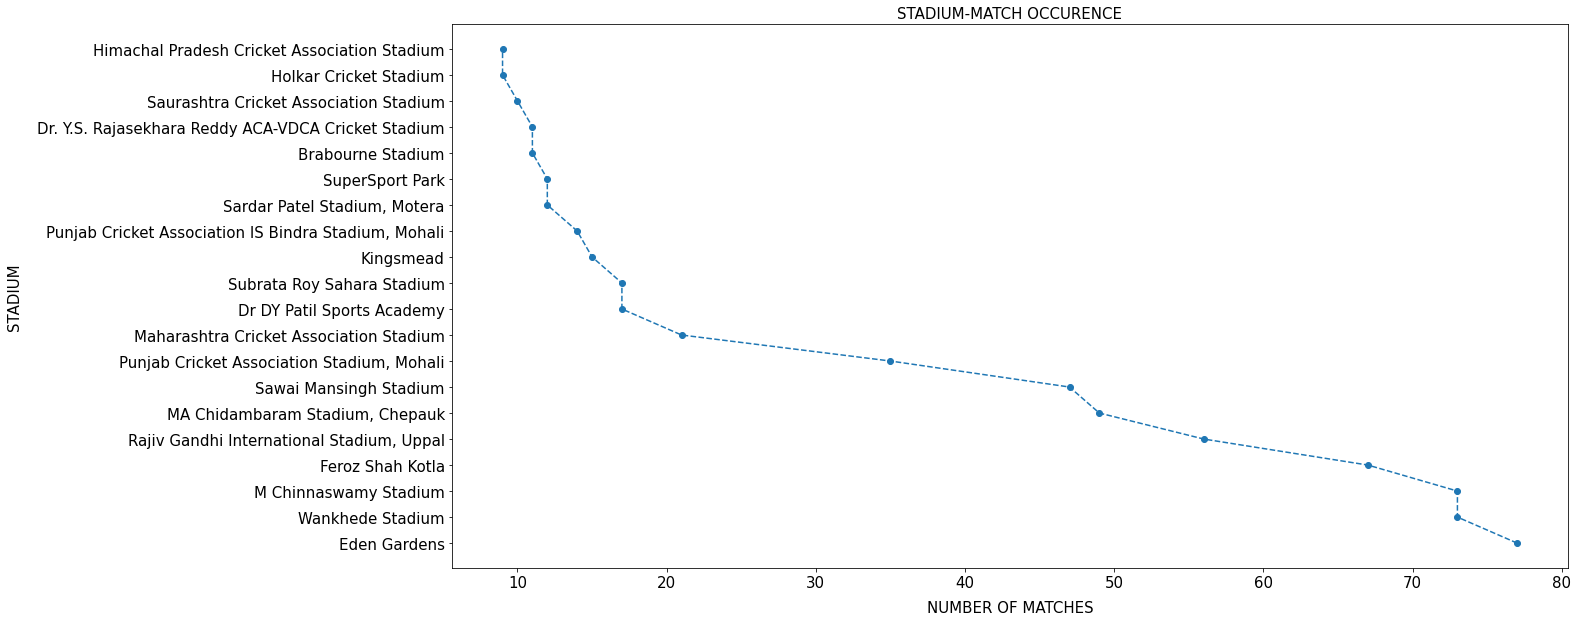

In [30]:
plt.figure(figsize=(20,10))
plt.plot(count_stadium,stadium_names,'p--',marker='o')
plt.tick_params(axis='x',which='major' ,labelsize=15)
plt.tick_params(axis='y',which='major' ,labelsize=15)
plt.ylabel('STADIUM',labelpad=15,fontsize=15)
plt.xlabel('NUMBER OF MATCHES',labelpad=10,fontsize=15)
plt.title('STADIUM-MATCH OCCURENCE',fontsize=15);

###  Venue and match played 

In [31]:
matches['winner'] = matches['winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches['team1'] = matches['team1'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches['team2'] = matches['team2'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

In [32]:
city_venue = matches.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

season
city           venue                                                     
0              Dubai International Cricket Stadium                      7
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bangalore      M Chinnaswamy Stadium                                   66
Bengaluru      M Chinnaswamy Stadium                                    7
               M. Chinnaswamy Stadium                                   7
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...      11
               Punjab Cricket Association Stadium, Mohali              35
Chennai        M. A. Chidambaram Stadium                                8
               MA Chidambaram Stadium, Chepauk                         49
Cuttack        Barabati Stadium                                         7
Delhi          Feroz Shah Kotla                                        67
               Feroz Shah Kotla Ground                                  7
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium, Uppal               56
               Rajiv Gandhi Intl. Cricket Stadium                       8
Indore         Holkar Cricket Stadium                                   9
Jaipur         Sawai Mansingh Stadium                                  47
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               4
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            77
Mohali         IS Bindra Stadium                                        7
               Punjab Cricket Association IS Bindra Stadium, M...       3
Mumbai         Brabourne Stadium                                       11
               Dr DY Patil Sports Academy                              17
               Wankhede Stadium                                        73
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                 21
               Subrata Roy Sahara Stadium                              17
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                  10
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                  6
Visakhapatnam  ACA-VDCA Stadium                                         2
               Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      11

### NUMBER OF MATCHES HELD IN EACH STADIUM


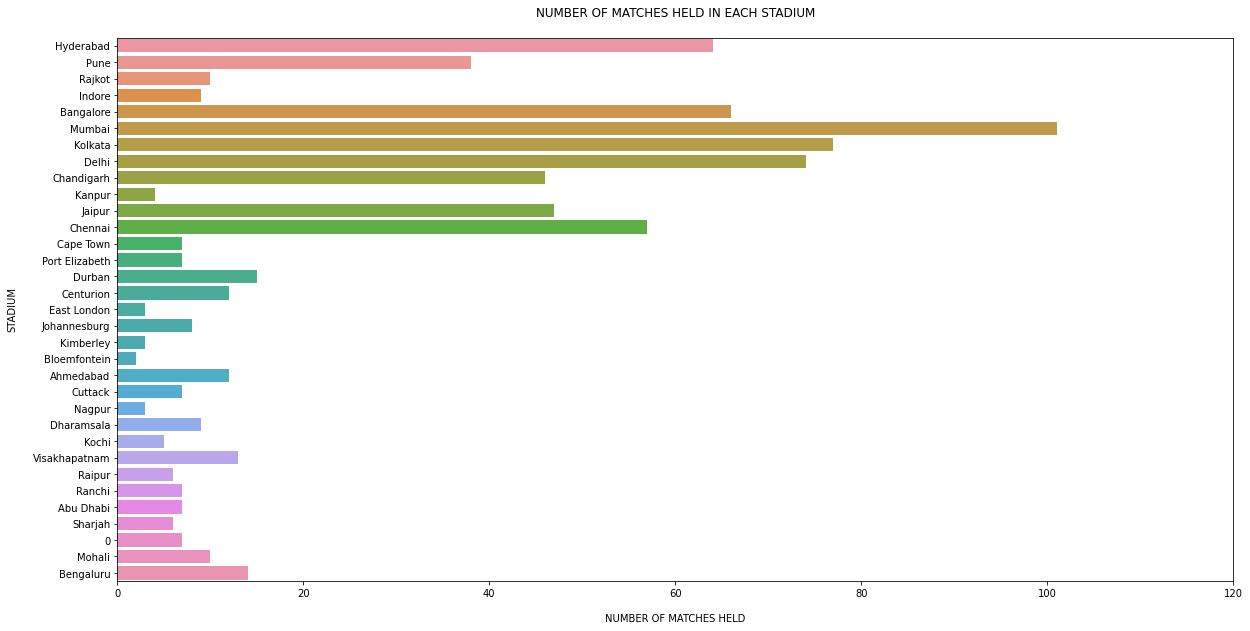

In [33]:
# Plot to visualise the no. of matches held in each city
sns.countplot(y='city', data=matches)
plt.gcf().set_size_inches(20,10)
plt.title('NUMBER OF MATCHES HELD IN EACH STADIUM\n') 
plt.xlabel('\nNUMBER OF MATCHES HELD')  
plt.ylabel('STADIUM\n')
plt.xlim([0,120])
plt.show()

### NUMBER OF MATCHES WON BY EACH TEAM

In [34]:
stat_won = matches['winner'].value_counts()
stat_won

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
0                                4
Name: winner, dtype: int64

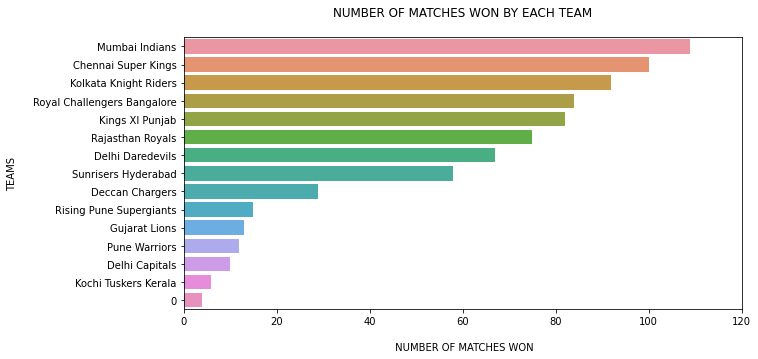

In [35]:
fig, ax=plt.subplots()
ax.set_xlim([0,120])
plt.gcf().set_size_inches(10,5)
sns.barplot(y=stat_won.index, x=stat_won, orient='h')
plt.title('NUMBER OF MATCHES WON BY EACH TEAM\n')  
plt.xlabel("\n NUMBER OF MATCHES WON")
plt.ylabel('TEAMS\n')
plt.show()

### Average score of batsmen

In [36]:
#finding the top batsmen based on their average(runs/no.of dismissals)
outs = cricket['player_dismissed'].value_counts().tolist()
bat_out = cricket['player_dismissed'].value_counts().index.tolist()
d_batout = {}
for i in range(len(outs)):
    d_batout.setdefault(bat_out[i],outs[i])
run=cricket.groupby('batsman')
bl = run['batsman_runs'].sum().index.tolist()
br = run['batsman_runs'].sum().tolist()
bat_run = {}
for i in range(len(bl)):
    bat_run.setdefault(bl[i],br[i])
average_bat = {}
for i in d_batout.keys():
    if i in bat_run:
        average_bat.setdefault(i,bat_run[i]/d_batout[i])
result_avg = dict(sorted(average_bat.items(),reverse=True,key= lambda x:x[1]))            
result_avg_names = list(result_avg.keys())
result_avg_scores = list(result_avg.values())

Text(0, 0.5, 'BATSMEN')

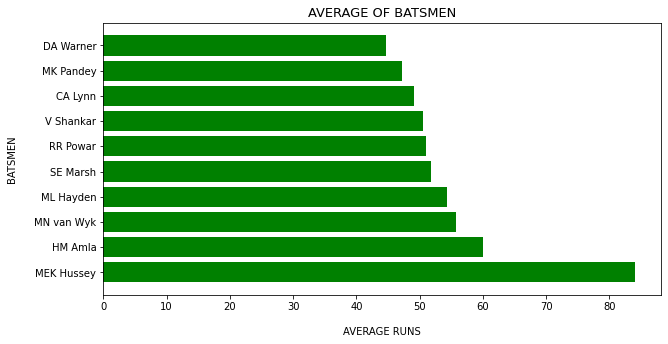

In [37]:
plt.figure(figsize=(10,5))
plt.title('AVERAGE OF BATSMEN',fontsize=13) 
plt.barh(result_avg_names[:10],result_avg_scores[:10],color='green')
plt.xlabel('AVERAGE RUNS',labelpad=15)
plt.ylabel('BATSMEN',labelpad=17)